In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from modules.edge_detection import detect_edges

['female106ED_0000.nii.gz', 'female106ES_0000.nii.gz', 'male96ED_0000.nii.gz', 'male96ES_0000.nii.gz']
female106ED_0000.nii.gz
(256, 256, 9)


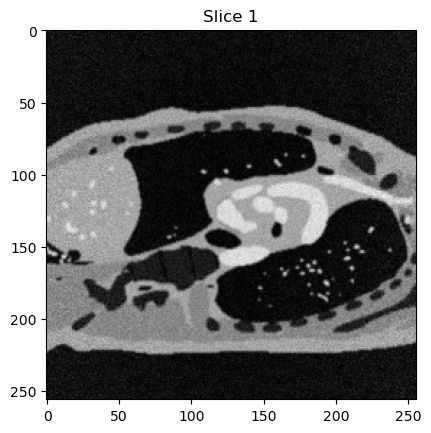

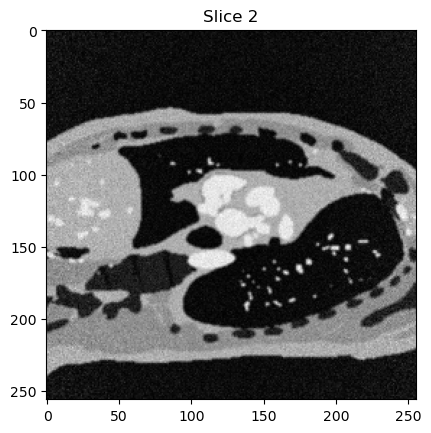

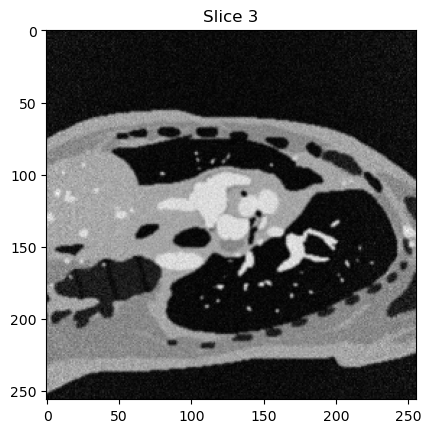

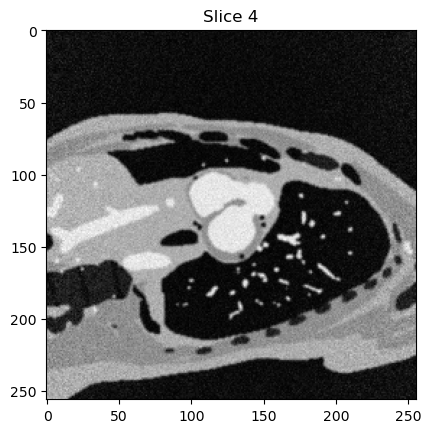

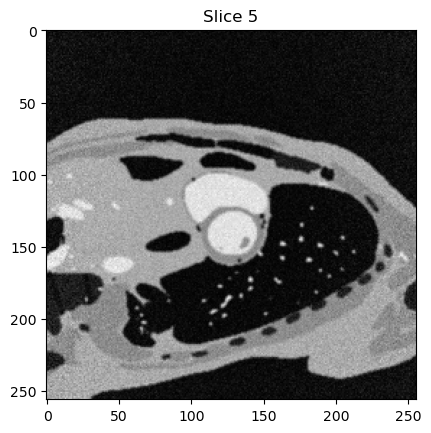

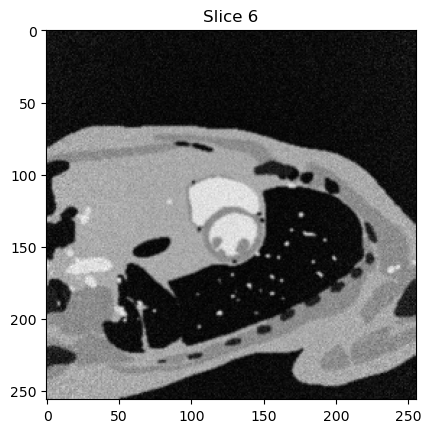

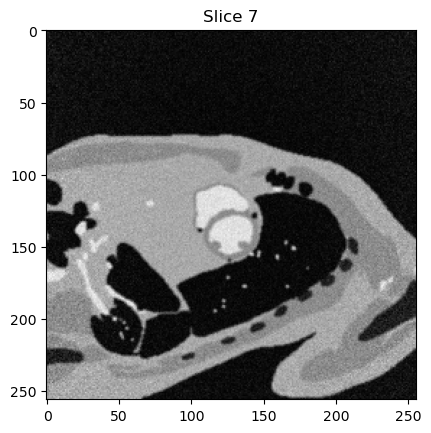

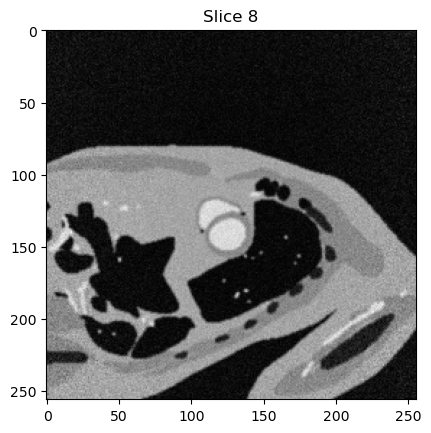

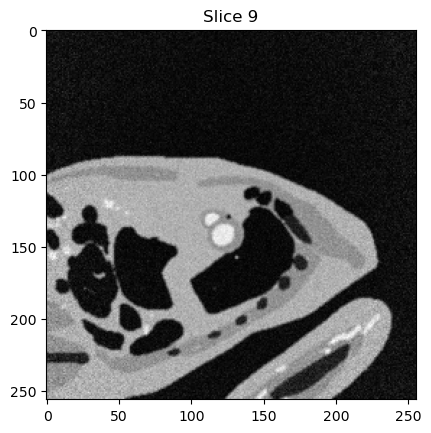

In [2]:
subject_path = "phantom_data/image/"
files = [d for d in os.listdir(subject_path) if d.endswith(('.nii', '.nii.gz'))]
files = sorted(files)
print(files)

for file in files[0:1]:
    # Skip non-NIfTI files
    if not file.endswith(('.nii', '.nii.gz')):
        continue

    img = nib.load(os.path.join(subject_path, file))
    data = img.get_fdata()

    print(file)
    print(data.shape)

    for i in range(data.shape[2]):
        plt.imshow(data[:, :, i], cmap='gray')
        plt.title(f'Slice {i+1}')
        plt.show()


['female106ED.nii.gz', 'female106ES.nii.gz', 'male96ED.nii.gz', 'male96ES.nii.gz']
female106ED.nii.gz
(256, 256, 9)


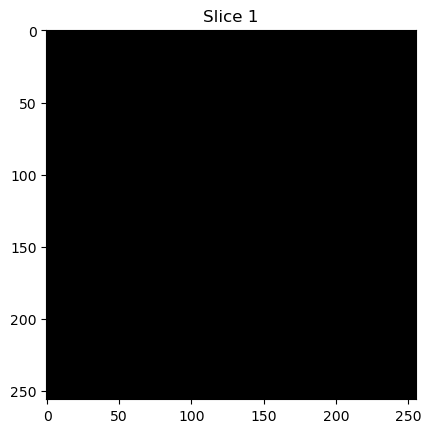

Unique values in slice 1: [0.]


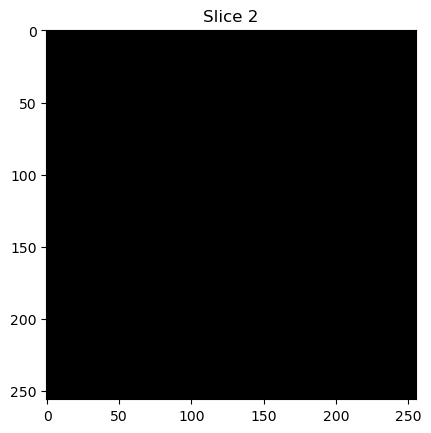

Unique values in slice 2: [0.]


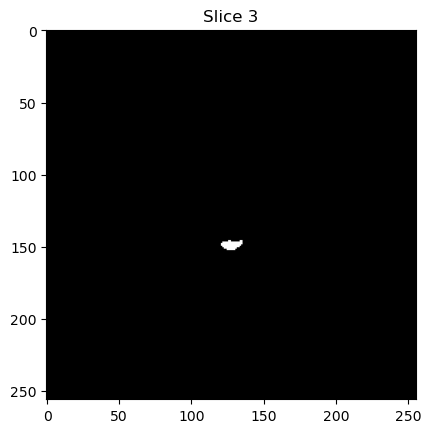

Unique values in slice 3: [0. 2.]


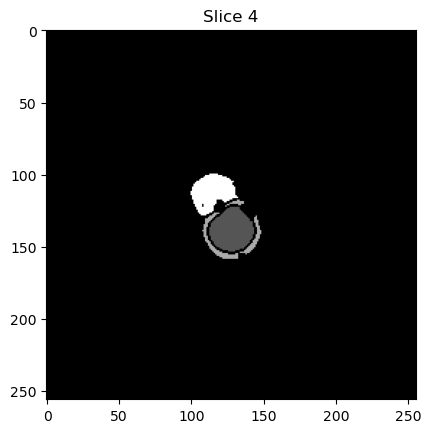

Unique values in slice 4: [0. 1. 2. 3.]


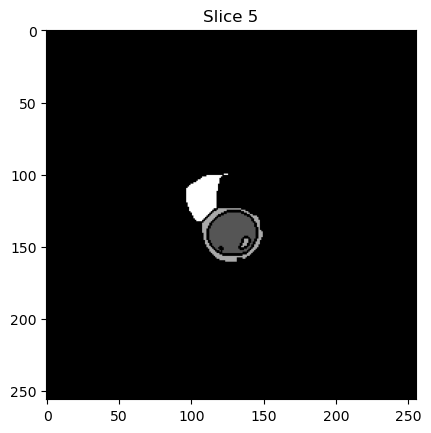

Unique values in slice 5: [0. 1. 2. 3.]


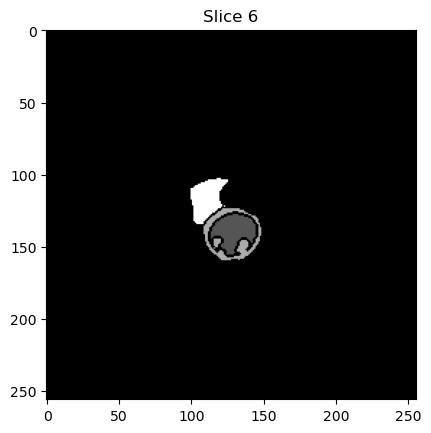

Unique values in slice 6: [0. 1. 2. 3.]


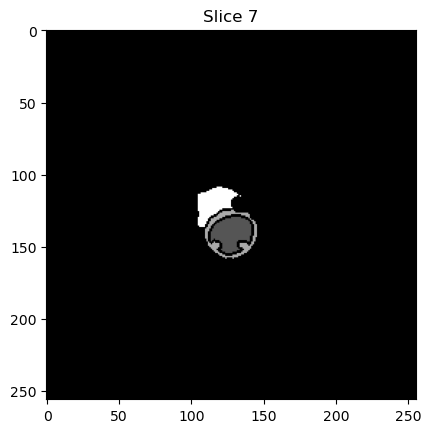

Unique values in slice 7: [0. 1. 2. 3.]


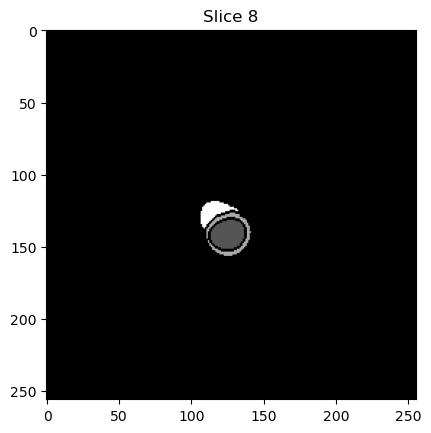

Unique values in slice 8: [0. 1. 2. 3.]


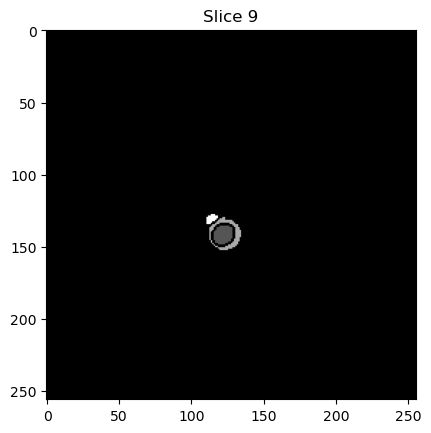

Unique values in slice 9: [0. 1. 2. 3.]
female106ES.nii.gz
(256, 256, 9)


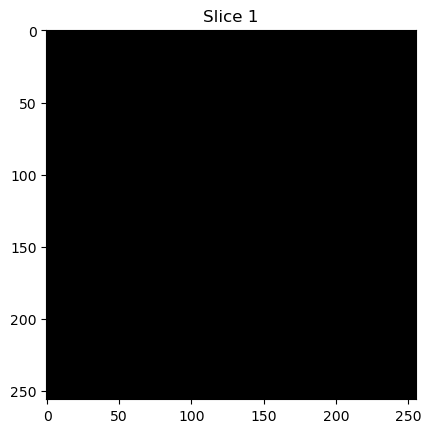

Unique values in slice 1: [0.]


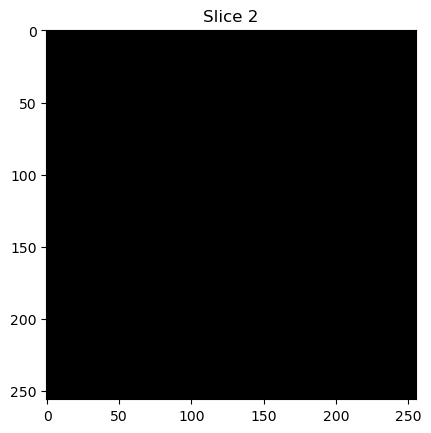

Unique values in slice 2: [0.]


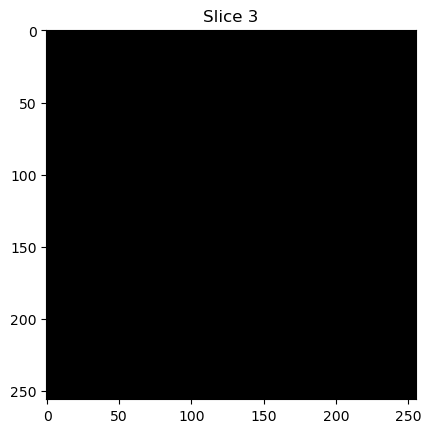

Unique values in slice 3: [0.]


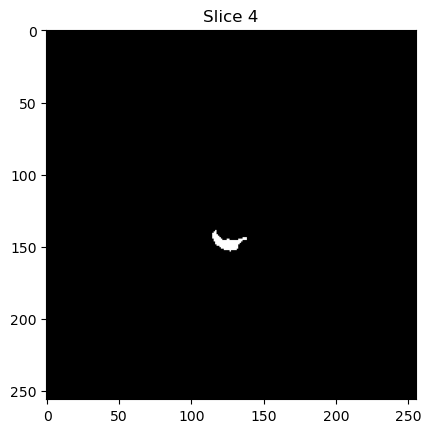

Unique values in slice 4: [0. 2.]


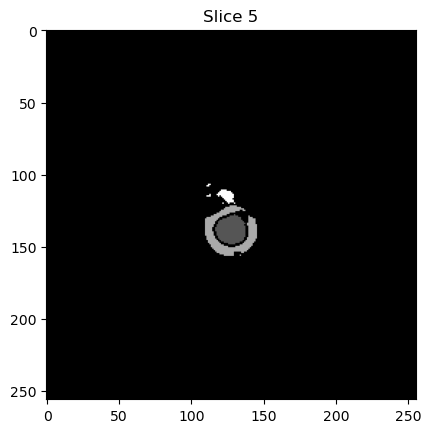

Unique values in slice 5: [0. 1. 2. 3.]


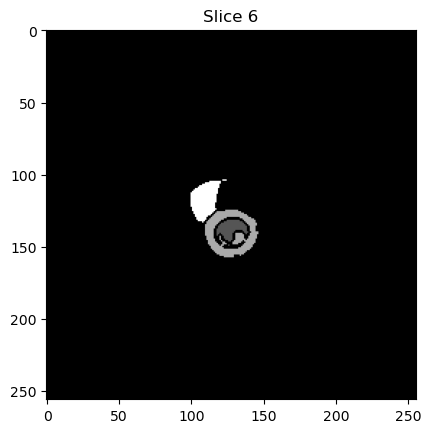

Unique values in slice 6: [0. 1. 2. 3.]


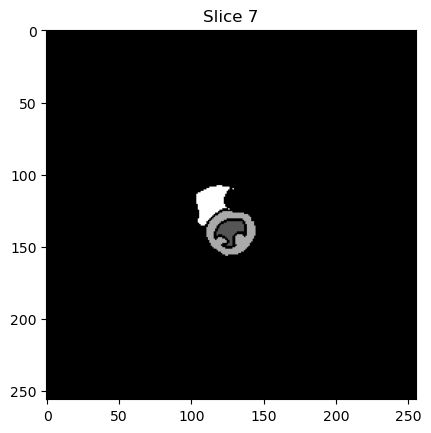

Unique values in slice 7: [0. 1. 2. 3.]


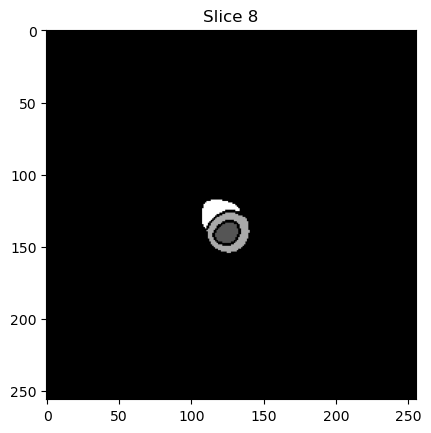

Unique values in slice 8: [0. 1. 2. 3.]


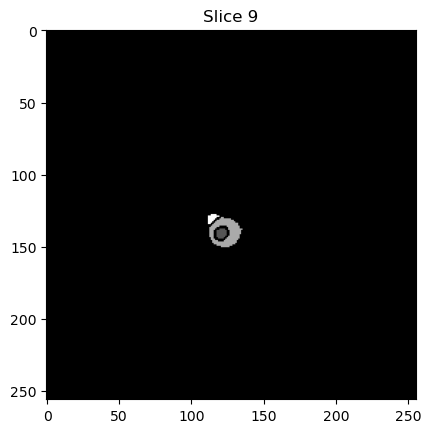

Unique values in slice 9: [0. 1. 2. 3.]
male96ED.nii.gz
(256, 256, 10)


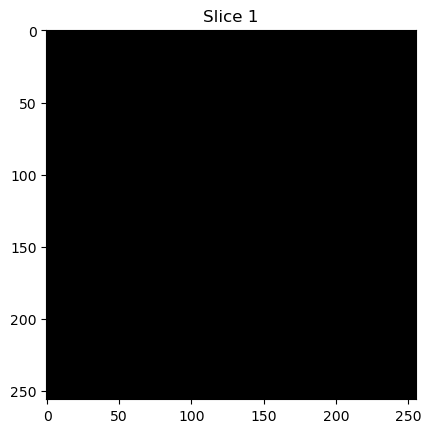

Unique values in slice 1: [0.]


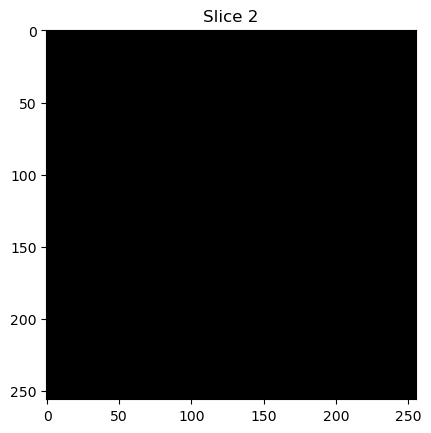

Unique values in slice 2: [0.]


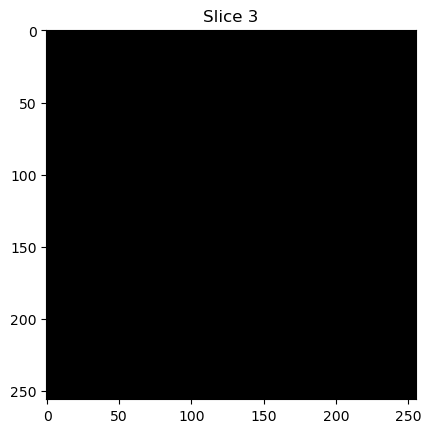

Unique values in slice 3: [0.]


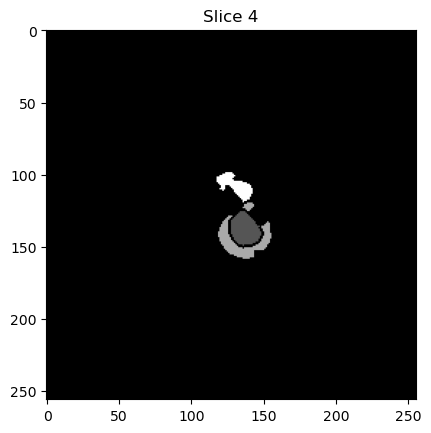

Unique values in slice 4: [0. 1. 2. 3.]


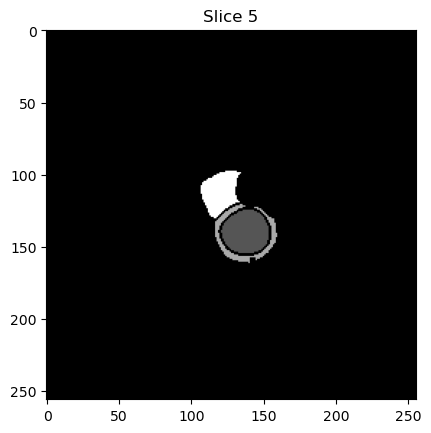

Unique values in slice 5: [0. 1. 2. 3.]


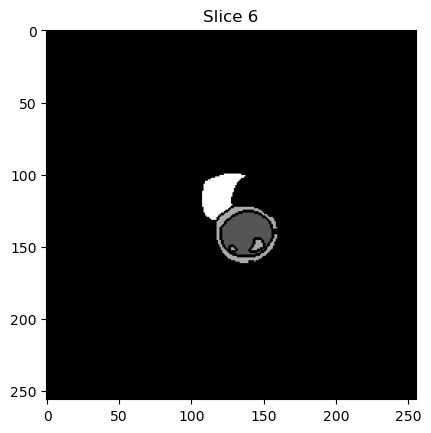

Unique values in slice 6: [0. 1. 2. 3.]


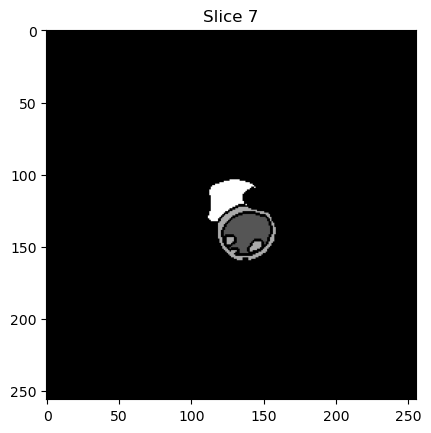

Unique values in slice 7: [0. 1. 2. 3.]


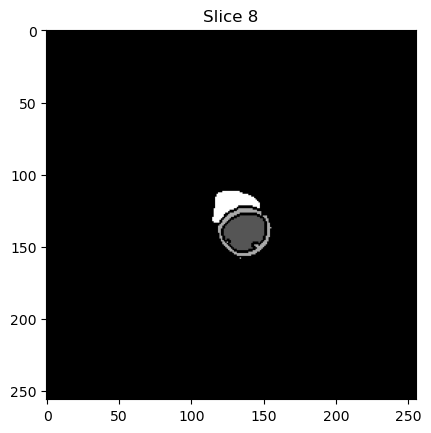

Unique values in slice 8: [0. 1. 2. 3.]


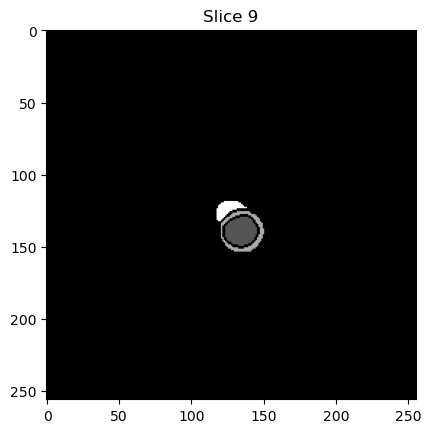

Unique values in slice 9: [0. 1. 2. 3.]


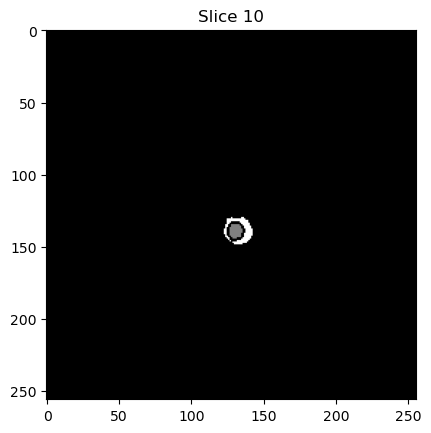

Unique values in slice 10: [0. 1. 2.]
male96ES.nii.gz
(256, 256, 10)


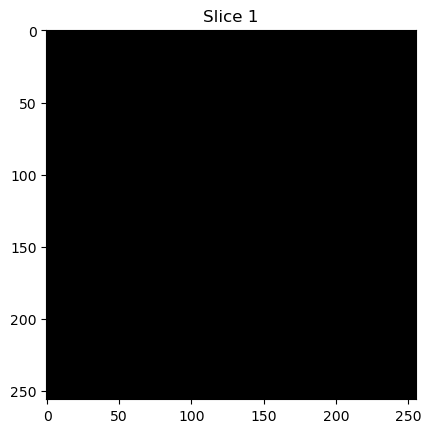

Unique values in slice 1: [0.]


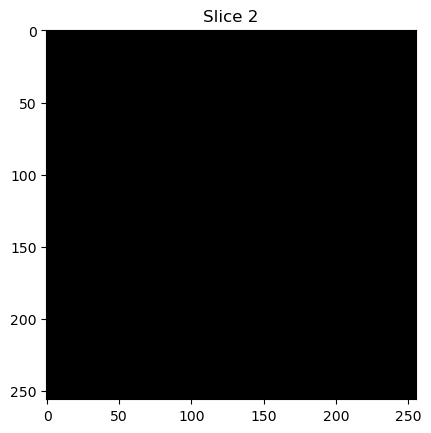

Unique values in slice 2: [0.]


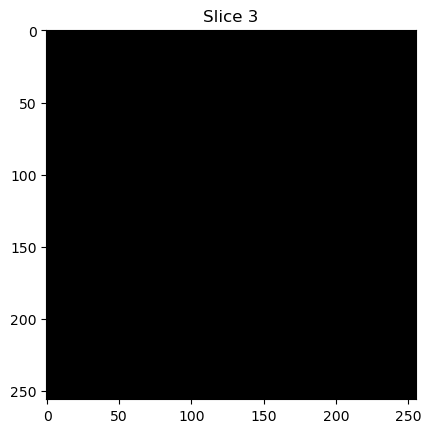

Unique values in slice 3: [0.]


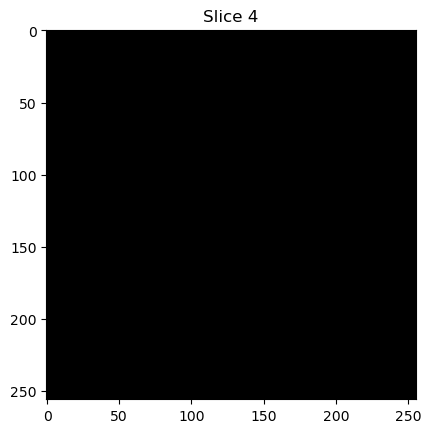

Unique values in slice 4: [0.]


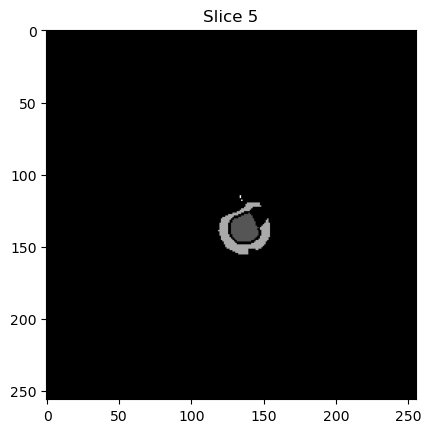

Unique values in slice 5: [0. 1. 2. 3.]


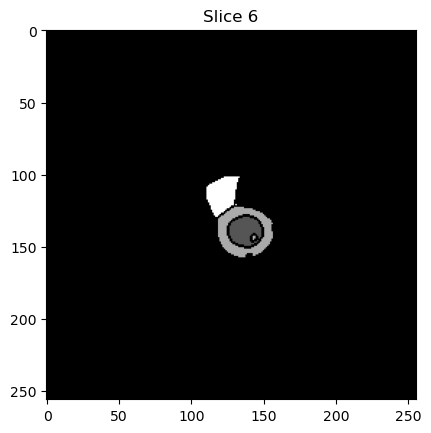

Unique values in slice 6: [0. 1. 2. 3.]


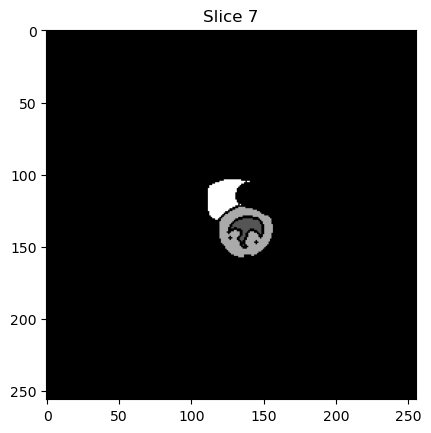

Unique values in slice 7: [0. 1. 2. 3.]


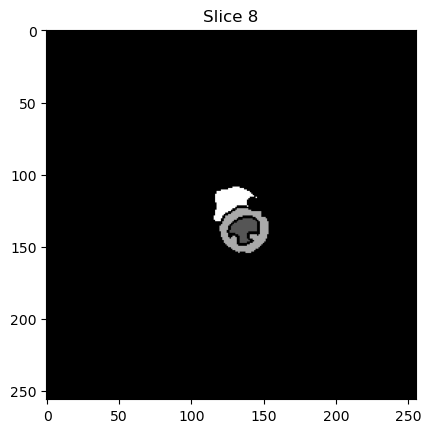

Unique values in slice 8: [0. 1. 2. 3.]


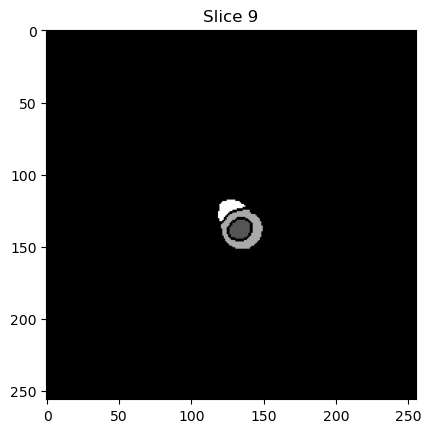

Unique values in slice 9: [0. 1. 2. 3.]


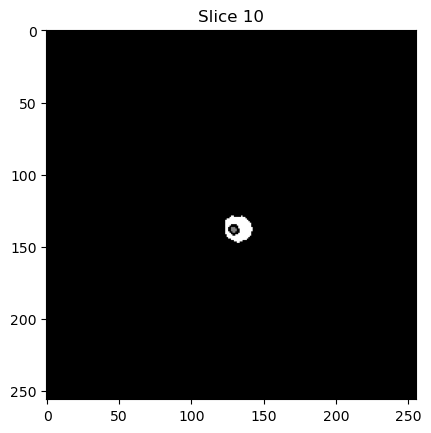

Unique values in slice 10: [0. 1. 2.]


In [3]:
label_path = "phantom_data/label/"
label_files = [d for d in os.listdir(label_path) if d.endswith(('.nii', '.nii.gz'))]
label_files = sorted(label_files)
print(label_files)

for file in label_files:
    if not file.endswith(('.nii', '.nii.gz')):
        continue

    img = nib.load(os.path.join(label_path, file))
    data = img.get_fdata()
    print(file)
    print(data.shape)

    for i in range(data.shape[2]):
        # Create a copy of the slice to modify
        slice_data = data[:, :, i].copy()
        
        # Remap values
        slice_data[slice_data == 104] = 1
        slice_data[slice_data == 100] = 2
        slice_data[slice_data == 105] = 3
        # Set all other non-zero values to 0
        slice_data[~np.isin(slice_data, [0, 1, 2, 3])] = 0
        
        plt.imshow(slice_data, cmap='gray')
        plt.title(f'Slice {i+1}')
        plt.show()

        # Print unique values in this slice
        unique_vals = np.unique(slice_data)
        print(f'Unique values in slice {i+1}:', unique_vals)